In [2]:
import os 
import csv
import networkx as nx
g = nx.MultiGraph()

transactionCount = 0
path = os.getcwd() + "/random_data_2.csv"
with open(path, encoding='utf-8-sig') as file:
    data = csv.DictReader(file)
    for row in data:
        # print(row)
        transactionCount += 1

        # Weaver_id,Role,Quantity,Type,Category,border,color,season,Centre,Rating    -    Column headers
        s = row['Type'] + "*" + row['Category'] + "*" + row['border'] + "*" + row['color']

        try:
            # Check if product node G[s] already exists.If yes, proceed otherwise go to except block
            g[s]
            # If yes, increment stock by the quantity that the weaver sold to company
            g.nodes[s]['Stock'] += int(row['Quantity'])

        except:
            # Key error which means product node G[s] couldn't be found
            g.add_node(s, Stock=int(row['Quantity']))
            g.add_edges_from([(s,row['Type']),(s,row['Category']),(s,row['border']),(s,row['color'])])

        # Link weaver with product with details of product as edge attributes
        g.add_edge(row['Weaver_id'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        g.add_edge(row['season'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        # g.add_edge(row['Centre'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        # g.add_edge(row['Rating'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
#         if transactionCount == 1:
#             break
# print(transactionCount)
# print(g['Accessories'])
# print("sds")
# print(g.nodes[s])
# nx.draw(g, with_labels=True)

In [89]:
# Using pickle to store the graph and can be later loaded into another variable 'g'
import pickle, os
path = os.getcwd() + "/Graph1.txt"
# Uncomment below line to store graph
pickle.dump(g, open(path, 'wb'))

In [90]:
# By loading the graph, we may only add new transactions to existing graph
# Uncomment below line to load teh graph
g = pickle.load(open(path,'rb'))

# Find the current stock of any product available with the company

In [6]:
# Find the current stock of any product available with the company

def findStock(ty="",cat="",bor="",col=""):
    if ty=="" and cat=="" and bor=="" and col=="":
        print("Atleast one attribute/filter must be specified")
    else:
        count = 0

        
        if ty!="":
            d = g[ty]
        elif cat!="":
            d = g[cat]
        elif bor!="":
            d = g[bor]
        else:
            d = g[col]

        for i in d.keys():
            if str(i).find(ty) != -1 and str(i).find(cat) != -1 and str(i).find(bor) != -1 and str(i).find(col) != -1:
                count += g.nodes[i]['Stock']
                # print(i)
                # print(g[i])
        print(count)

# Pass the category, type, border and color to this function to get back the available stock for that product

# findStock(type, category, border, color)
findStock("Accessories","Bermuda","Golden-Zari","Blue")

1834


In [21]:
# To verify that the above query is answered correctly, we can verify using the following code which performs a linear search
# over all records and returns the stock by summing up the quantity of that transaction

with open('random_data_2.csv', encoding='utf-8-sig') as file:
    c = 0
    data = csv.DictReader(file)
    for row in data:
        if row['Category'] == "Bluse" and row['Type'] == "Bagru" and row['border'] == "Floral" and row['color'] == "Green":
            c += int(row['Quantity'])
print(c)

16324


# List all transactions made between a particular weaver and the company.

{0: {'w_id': '2200003', 'quantity': '5', 'month': 'April', 'centre': 'Mumbai', 'rating': '4s'}}
{0: {'w_id': '2200003', 'quantity': '7', 'month': 'October', 'centre': 'Mumbai', 'rating': '5s'}}
{0: {'w_id': '2200003', 'quantity': '7', 'month': 'November', 'centre': 'Hyderabad', 'rating': '2s'}}
{0: {'w_id': '2200003', 'quantity': '6', 'month': 'October', 'centre': 'Mumbai', 'rating': '2s'}}
{0: {'w_id': '2200003', 'quantity': '2', 'month': 'March', 'centre': 'Hyderabad', 'rating': '3s'}}
{0: {'w_id': '2200003', 'quantity': '10', 'month': 'November', 'centre': 'Hyderabad', 'rating': '4s'}}
{0: {'w_id': '2200003', 'quantity': '10', 'month': 'September', 'centre': 'Hyderabad', 'rating': '2s'}}
Number of transactions made by weaver with id 2200003 is :  7


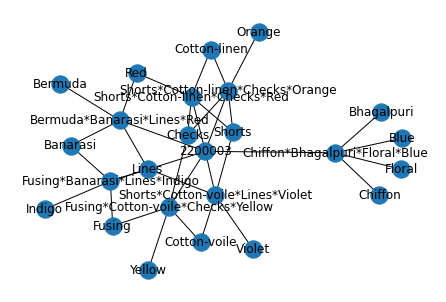

In [22]:
# List all transactions made between a particular weaver and the company.
P = nx.MultiGraph()
def a(id):
    count = 0
    for i in g[id].keys():
        count += 1
        print(g[id][i])
        l = str(i).split("*")
        P.add_edges_from([(id,i),(i,l[0]),(i,l[1]),(i,l[2]),(i,l[3])])
    print("Number of transactions made by weaver with id",id,"is : ",count)

# Pass any weaver id to get the list of transactions between them and the company        
a("2200003")

# Plots the subgraph used to answer this query
nx.draw(P,with_labels=True)


# Fetch transaction details based on month / center / rating of product.

In [120]:
def transactions(months, centres, ratings, wids):
    count = 0

    if wids:
        print("Yess")
        for wid in wids:
            for pdt in g[wid].keys():
                for index in g[wid][pdt].keys():
                    transaction = g[wid][pdt][index].copy()
                    if transaction['month'] in months and transaction['centre'] in centres and transaction['rating'] in ratings:
                        transaction['pdt'] = pdt
                        print(transaction)
                        count += 1

    else:
        print("NO")
        for mon in months:
            # print(g[mon])
            for pdt in g[mon].keys():
                # print(pdt)
                for index in g[mon][pdt].keys():
                    transaction = g[mon][pdt][index].copy()
                    if transaction['centre'] in centres and transaction['rating'] in ratings:
                        transaction['pdt'] = pdt
                        print(transaction)
                        # print(g[mon][pdt][index])
                        count += 1

    print(count)

    
transactions(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],["Bangalore", "Hyderabad", "Mumbai"],["1s", "2s", "3s", "4s", "5s"],['2221912', '2245035'])
# 141


Yess
{'w_id': '2221912', 'quantity': '8', 'month': 'September', 'centre': 'Bangalore', 'rating': '1s', 'pdt': 'Accessories*Cutting Roll*Golden-Zari*Yellow'}
{'w_id': '2221912', 'quantity': '1', 'month': 'July', 'centre': 'Mumbai', 'rating': '2s', 'pdt': 'Cotton-linen*Bluse*Checks*Blue'}
{'w_id': '2221912', 'quantity': '6', 'month': 'July', 'centre': 'Mumbai', 'rating': '5s', 'pdt': 'Bhagalpuri*Bluse*Golden-Zari*Violet'}
{'w_id': '2221912', 'quantity': '8', 'month': 'November', 'centre': 'Mumbai', 'rating': '3s', 'pdt': 'Cotton-voile*Crochet Lace*Checks*Orange'}
{'w_id': '2221912', 'quantity': '3', 'month': 'May', 'centre': 'Hyderabad', 'rating': '4s', 'pdt': 'Cotton-linen*AC Blanket(DOHAR)*Lines*Orange'}
{'w_id': '2221912', 'quantity': '6', 'month': 'August', 'centre': 'Hyderabad', 'rating': '3s', 'pdt': 'Bagru*Cutting Roll*Lines*Blue'}
{'w_id': '2221912', 'quantity': '7', 'month': 'November', 'centre': 'Bangalore', 'rating': '1s', 'pdt': 'Bagru*Chiffon*Lines*Green'}
{'w_id': '2245035'

In [1]:
top={
    'wid':[],
    'q_wid':[],
    'pdt':[],
    'q_pdt':[]
}
x={'wrf':43, 'rwrw':22, 'asssa':33, 'erer': 5, 'qqq': 20}
x={k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
print(x)
top['wid'] =  (list(x.keys()))[:4]
print(top['wid'])
try:
    x['qqq'] += 10
    print(x['qqq'])
except:
    x['qqq'] = 10
    print(x['qqq'])


{'wrf': 43, 'asssa': 33, 'rwrw': 22, 'qqq': 20, 'erer': 5}
['wrf', 'asssa', 'rwrw', 'qqq']
30


In [21]:
def products(types,categories,borders,colors):
    data=[0,[], 0]
    for type in types:
        for product in g[type].keys():
            names=product.split('*')
            for item4 in categories:
                if names[1]==item4:
                    for item5 in borders:
                        if names[2]==item5:
                            for item6 in colors:
                                if names[3]==item6:
                                    temp={product : g.nodes[product]['Stock']}
                                    data[0]+=1
                                    data[1].append(temp)
                                    data[2]+= g.nodes[product]['Stock']
    return data
print(products(["Accessories"],["Bermuda"],["Golden-Zari"],["Blue", "Red"]))
print(data[2])

[2, [{'Accessories*Bermuda*Golden-Zari*Red': 1808}, {'Accessories*Bermuda*Golden-Zari*Blue': 1834}], 3642]


TypeError: 'DictReader' object is not subscriptable

# AFTER MOM 4

In [30]:
#Weavers
import os 
import csv
import networkx as nx
g = nx.MultiGraph()

transactionCount = 0
path = os.getcwd() + "/weaverdata.csv"
with open(path, encoding='utf-8-sig') as file:
    data = csv.DictReader(file)
    for row in data:
        # print(row)
        transactionCount += 1
        if transactionCount == 100000:
            break
        # Weaver_id,Role,Quantity,Type,Category,border,color,season,Centre,Rating    -    Column headers
        s = row['Type'] + "*" + row['Category'] + "*" + row['Border'] + "*" + row['Color']

        try:
            # Check if product node G[s] already exists.If yes, proceed otherwise go to except block
            g[s]
            # If yes, increment stock by the quantity that the weaver sold to company
            g.nodes[s]['Stock'] += int(row['Quantity'])

        except:
            # Key error which means product node G[s] couldn't be found
            g.add_node(s, Stock=int(row['Quantity']))
            g.add_edges_from([(s,row['Type']),(s,row['Category']),(s,row['Border']),(s,row['Color'])])

        # Link weaver with product with details of product as edge attributes
        g.add_edge(row['Weaver_id'], s, w_id=row['Weaver_id'] ,w_quantity=row['Quantity'], w_month=row['Month'], w_year=row['Year'], w_region=row['Region'], w_centre=row['Centre'], w_rating=row['Rating'],w_cost=row['Cost'], relation='SoldBy')
        g.add_edge(row['Month'], s, w_id=row['Weaver_id'] ,w_quantity=row['Quantity'], w_month=row['Month'], w_year=row['Year'], w_region=row['Region'], w_centre=row['Centre'], w_rating=row['Rating'],w_cost=row['Cost'], relation='SoldIn')

In [31]:
# Retailers
path = os.getcwd() + "/NewData.csv"
with open(path, encoding='utf-8-sig') as file:
    data = csv.DictReader(file)
    for row in data:
        # print(row)
        transactionCount += 1
        if transactionCount == 100000:
            break
        # Weaver_id,Role,Quantity,Type,Category,border,color,season,Centre,Rating    -    Column headers
        s = row['Type'] + "*" + row['Category'] + "*" + row['Border'] + "*" + row['Color']

        try:
            # Check if product node G[s] already exists.If yes, proceed otherwise go to except block
            g[s]
            # If yes, increment stock by the quantity that the weaver sold to company
            g.nodes[s]['Stock'] -= int(row['Quantity'])

        except:
            # Key error which means product node G[s] couldn't be found
            g.add_node(s, Stock=int(row['Quantity']))
            # g.add_edges_from([(s,row['Type']),(s,row['Category']),(s,row['Border']),(s,row['Color'])])

        # Link weaver with product with details of product as edge attributes
        g.add_edge(row['Retailer_id'], s, r_id=row['Retailer_id'] ,r_quantity=row['Quantity'], r_r_month=row['Month'], r_year=row['Year'], r_region=row['Region'], r_centre=row['Centre'], r_rating=row['Rating'],r_cost=row['Cost'], relation='BoughtBy')
        g.add_edge(row['Month'], s, r_id=row['Retailer_id'] ,r_quantity=row['Quantity'], r_month=row['Month'], r_year=row['Year'], r_region=row['Region'], r_centre=row['Centre'], r_rating=row['Rating'],r_cost=row['Cost'],relation='BoughtIn')

In [32]:
import pickle, os
path = os.getcwd() + "/Graph1.txt"
# Uncomment below line to store graph
pickle.dump(g, open(path, 'wb'))

In [33]:
g = pickle.load(open(path,'rb'))

In [34]:
def products(types,categories,borders,colors):
    data=[0,[],0]
    for type in types:
        for product in g[type].keys():
            names=product.split('*')
            for item4 in categories:
                if names[1]==item4:
                    for item5 in borders:
                        if names[2]==item5:
                            for item6 in colors:
                                if names[3]==item6:
                                    temp={product : g.nodes[product]['Stock']}
                                    data[0]+=1
                                    data[1].append(temp)
                                    data[2]+= g.nodes[product]['Stock']

    return data

products(['Art silk'],['Fusing'],['Checks'],['Violet'])
# print(g.nodes['Art silk*Fusing*Checks*Violet'])

[1, [{'Art silk*Fusing*Checks*Violet': -1208}], -1208]

In [35]:
def newfun(role,filter,filter2,centre,month,year):
    dict1={}
    dict2={}
    dict3={}
    list1=[0,0,[]]
    list2=[0,0,[]]
    data=[0,0,[]]
    if filter=='Type':
        q=0
    elif filter=='Category':
        q=1
    elif filter=='Border':
        q=2
    elif filter=='Color':
        q=3

    if filter2=='season':
        var1='w_month'
        var2='r_month'
        var3=month
        data[0]=0
    elif filter2=='centre':
        var1='w_centre'
        var2='r_centre'
        var3=centre
        data[0]=1
    elif filter2=='year':
        var1='w_year'
        var2='r_year'
        var3=year
        data[0]=2
    
    for elements in var3:
        tup={elements : {}}
        dict1.update(tup)
    for elements in var3:
        tup={elements : {}}
        dict2.update(tup)
    for elements in var3:
        tup={elements : 0}
        dict3.update(tup)
    

    
    for item in month:
        for item2 in g[item].keys():
            for item3 in g[item][item2].keys():
                if role=='Weaver':
                    if g[item][item2][item3]['relation']=='SoldIn' and g[item][item2][item3]['w_centre'] in centre and g[item][item2][item3]['w_year'] in year:
                        data[1]+=1
                        temp=item2.split('*')
                        dict3[g[item][item2][item3][var1]]+=1
                        if temp[q] in dict1[g[item][item2][item3][var1]].keys():
                            dict1[g[item][item2][item3][var1]][temp[q]]+=1
                            dict2[g[item][item2][item3][var1]][temp[q]]+=int(g[item][item2][item3]['w_quantity'])
                        else:
                            temp3={temp[q] : 1}
                            dict1[g[item][item2][item3][var1]].update(temp3)
                            temp3={temp[q] : int(g[item][item2][item3]['w_quantity'])}
                            dict2[g[item][item2][item3][var1]].update(temp3)
                elif role=='Retailer':
                    if g[item][item2][item3]['relation']=='BoughtIn' and g[item][item2][item3]['r_centre'] in centre and g[item][item2][item3]['r_year'] in year:
                        data[1]+=1
                        temp=item2.split('*')
                        dict3[g[item][item2][item3][var2]]+=1
                        if temp[q] in dict1[g[item][item2][item3][var2]].keys():
                            dict1[g[item][item2][item3][var2]][temp[q]]+=1
                            dict2[g[item][item2][item3][var2]][temp[q]]+=int(g[item][item2][item3]['r_quantity'])
                        else:
                            temp3={temp[q] : 1}
                            dict1[g[item][item2][item3][var2]].update(temp3)
                            temp3={temp[q] : int(g[item][item2][item3]['r_quantity'])}
                            dict2[g[item][item2][item3][var2]].update(temp3)
            
               
    for i in dict1.keys():
        dict4=dict1[i].copy()
        dict5=dict2[i].copy()
        for j in dict5.keys():
            list1[2].append({j:dict4[j]})
            list1[2].append({j:dict5[j]})
        list1[0]=i
        list1[1]=dict3[i]
        list2=list1.copy()
        list2[2]=list1[2].copy()
        list1[2].clear()
        data[2].append(list2)       
    return data

In [36]:
months=['January','May','June', 'September', 'November', 'July']
centres=['Mumbai']
filter='Color'
year=['2012','2011']
role='Weaver'
filter2='season'
print(newfun(role,filter,filter2,centres,months,year))

[0, 1728, [['January', 306, [{'Violet': 48}, {'Violet': 259}, {'Blue': 52}, {'Blue': 274}, {'Red': 57}, {'Red': 283}, {'Green': 40}, {'Green': 180}, {'Yellow': 38}, {'Yellow': 222}, {'Indigo': 28}, {'Indigo': 140}, {'Orange': 43}, {'Orange': 227}]], ['May', 288, [{'Indigo': 51}, {'Indigo': 250}, {'Red': 42}, {'Red': 190}, {'Violet': 29}, {'Violet': 171}, {'Yellow': 34}, {'Yellow': 156}, {'Green': 48}, {'Green': 245}, {'Blue': 43}, {'Blue': 250}, {'Orange': 41}, {'Orange': 199}]], ['June', 285, [{'Blue': 47}, {'Blue': 202}, {'Yellow': 38}, {'Yellow': 222}, {'Orange': 41}, {'Orange': 206}, {'Green': 47}, {'Green': 249}, {'Indigo': 45}, {'Indigo': 185}, {'Violet': 31}, {'Violet': 161}, {'Red': 36}, {'Red': 175}]], ['September', 264, [{'Green': 28}, {'Green': 141}, {'Orange': 42}, {'Orange': 195}, {'Indigo': 36}, {'Indigo': 183}, {'Yellow': 39}, {'Yellow': 193}, {'Red': 45}, {'Red': 221}, {'Blue': 33}, {'Blue': 166}, {'Violet': 41}, {'Violet': 183}]], ['November', 247, [{'Yellow': 28}, {'Y